In [ ]:
import requests
import pandas as pd
import re
import bs4
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_costofliving=pd.read_csv('costofliving.csv')

In [3]:
df_costofliving

,Unnamed: 0,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
0,Agartala-India,550.0,100.0,109.67,10.00,33.33,77.00,226.67,118.00,53.33,...,1900000.00,1.00,466.67,NaN,2999.50,2000.00,4333.33,8166.67,21791.54,10.83
1,Agra,500.0,110.0,147.50,12.83,30.83,62.00,243.33,100.41,71.00,...,1338500.00,0.40,500.00,340000.00,2900.00,1537.50,3625.00,7250.00,27303.26,11.07
2,Ahmedabad,675.0,150.0,102.38,14.88,35.91,66.33,275.45,121.67,65.00,...,1642625.00,0.69,497.88,102607.14,2474.07,2343.33,8092.14,17258.14,29399.75,9.27
3,Aizawl-India,300.0,85.0,75.00,15.00,26.67,73.33,266.67,140.00,80.00,...,1050000.00,1.00,100.00,36000.00,1500.00,1750.00,5000.00,8000.00,NaN,5.00
4,Ajmer-India,650.0,100.0,91.67,15.00,25.00,61.33,240.00,117.00,36.67,...,1621000.00,0.53,225.00,108333.33,2100.00,2400.00,5500.00,10333.33,32291.73,8.75
5,Akola-India,500.0,150.0,101.67,11.67,25.00,60.00,175.00,111.78,60.00,...,1600000.00,0.73,NaN,91500.00,1533.33,2000.00,4166.67,7166.67,NaN,10.06
6,Allahabad-India,500.0,120.0,106.67,14.00,27.44,62.13,200.00,100.00,40.00,...,1627000.00,0.77,450.00,68666.67,2439.80,2269.67,4916.67,11000.00,53819.55,9.33
7,Alwar-India,750.0,112.5,120.00,14.75,30.00,65.78,239.17,125.00,58.54,...,1596200.00,0.72,NaN,163615.38,2833.33,2750.00,4166.67,6500.00,26909.78,9.29
8,Amravati,500.0,155.0,101.67,12.83,27.32,60.00,175.00,113.33,57.50,...,1600000.00,0.73,1425.00,81666.67,2250.00,2000.00,7666.67,15666.67,45746.62,10.06
9,Amritsar,700.0,150.0,115.33,17.41,29.03,62.33,233.33,128.18,50.00,...,1530800.00,0.98,466.67,119500.00,3000.00,2233.33,2500.00,15000.00,25222.26,9.38


In [4]:
df_costofliving.rename(columns={'Unnamed: 0':'Cities'},inplace=True)

In [5]:
df_costofliving

,Cities,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
0,Agartala-India,550.0,100.0,109.67,10.00,33.33,77.00,226.67,118.00,53.33,...,1900000.00,1.00,466.67,NaN,2999.50,2000.00,4333.33,8166.67,21791.54,10.83
1,Agra,500.0,110.0,147.50,12.83,30.83,62.00,243.33,100.41,71.00,...,1338500.00,0.40,500.00,340000.00,2900.00,1537.50,3625.00,7250.00,27303.26,11.07
2,Ahmedabad,675.0,150.0,102.38,14.88,35.91,66.33,275.45,121.67,65.00,...,1642625.00,0.69,497.88,102607.14,2474.07,2343.33,8092.14,17258.14,29399.75,9.27
3,Aizawl-India,300.0,85.0,75.00,15.00,26.67,73.33,266.67,140.00,80.00,...,1050000.00,1.00,100.00,36000.00,1500.00,1750.00,5000.00,8000.00,NaN,5.00
4,Ajmer-India,650.0,100.0,91.67,15.00,25.00,61.33,240.00,117.00,36.67,...,1621000.00,0.53,225.00,108333.33,2100.00,2400.00,5500.00,10333.33,32291.73,8.75
5,Akola-India,500.0,150.0,101.67,11.67,25.00,60.00,175.00,111.78,60.00,...,1600000.00,0.73,NaN,91500.00,1533.33,2000.00,4166.67,7166.67,NaN,10.06
6,Allahabad-India,500.0,120.0,106.67,14.00,27.44,62.13,200.00,100.00,40.00,...,1627000.00,0.77,450.00,68666.67,2439.80,2269.67,4916.67,11000.00,53819.55,9.33
7,Alwar-India,750.0,112.5,120.00,14.75,30.00,65.78,239.17,125.00,58.54,...,1596200.00,0.72,NaN,163615.38,2833.33,2750.00,4166.67,6500.00,26909.78,9.29
8,Amravati,500.0,155.0,101.67,12.83,27.32,60.00,175.00,113.33,57.50,...,1600000.00,0.73,1425.00,81666.67,2250.00,2000.00,7666.67,15666.67,45746.62,10.06
9,Amritsar,700.0,150.0,115.33,17.41,29.03,62.33,233.33,128.18,50.00,...,1530800.00,0.98,466.67,119500.00,3000.00,2233.33,2500.00,15000.00,25222.26,9.38


In [6]:
df_costofliving.set_index('Cities',inplace=True)

In [7]:
df_costofliving

,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Cities,,,,,,,,,,,,,,,,,,,,,
Agartala-India,550.0,100.0,109.67,10.00,33.33,77.00,226.67,118.00,53.33,25.00,...,1900000.00,1.00,466.67,NaN,2999.50,2000.00,4333.33,8166.67,21791.54,10.83
Agra,500.0,110.0,147.50,12.83,30.83,62.00,243.33,100.41,71.00,20.83,...,1338500.00,0.40,500.00,340000.00,2900.00,1537.50,3625.00,7250.00,27303.26,11.07
Ahmedabad,675.0,150.0,102.38,14.88,35.91,66.33,275.45,121.67,65.00,21.10,...,1642625.00,0.69,497.88,102607.14,2474.07,2343.33,8092.14,17258.14,29399.75,9.27
Aizawl-India,300.0,85.0,75.00,15.00,26.67,73.33,266.67,140.00,80.00,43.33,...,1050000.00,1.00,100.00,36000.00,1500.00,1750.00,5000.00,8000.00,NaN,5.00
Ajmer-India,650.0,100.0,91.67,15.00,25.00,61.33,240.00,117.00,36.67,18.30,...,1621000.00,0.53,225.00,108333.33,2100.00,2400.00,5500.00,10333.33,32291.73,8.75
Akola-India,500.0,150.0,101.67,11.67,25.00,60.00,175.00,111.78,60.00,21.11,...,1600000.00,0.73,NaN,91500.00,1533.33,2000.00,4166.67,7166.67,NaN,10.06
Allahabad-India,500.0,120.0,106.67,14.00,27.44,62.13,200.00,100.00,40.00,16.17,...,1627000.00,0.77,450.00,68666.67,2439.80,2269.67,4916.67,11000.00,53819.55,9.33
Alwar-India,750.0,112.5,120.00,14.75,30.00,65.78,239.17,125.00,58.54,20.83,...,1596200.00,0.72,NaN,163615.38,2833.33,2750.00,4166.67,6500.00,26909.78,9.29
Amravati,500.0,155.0,101.67,12.83,27.32,60.00,175.00,113.33,57.50,20.00,...,1600000.00,0.73,1425.00,81666.67,2250.00,2000.00,7666.67,15666.67,45746.62,10.06


In [8]:
df_costofliving.keys()

Index(['MealforPeopleMidrangeRestaurantThreecourse',
       'DomesticBeerliterdraught', 'Cappuccinoregular', 'Waterliterbottle',
       'LoafofFreshWhiteBread0g', 'Eggsregular',
       'ChickenBreastsBonelessSkinless1kg', 'Apples1kg', 'Oranges1kg',
       'Potato1kg', 'Lettucehead', 'BottleofWineMidRange',
       'ImportedBeerliterbottle', 'MonthlyPassRegularPrice',
       'Taxi1kmNormalTariff', 'Gasolineliter',
       'ToyotaCorolla6l7kWComfortOrEquivalentNewCar',
       'minofPrepaidMobileTariffLocalNoDiscountsorPlans',
       'TennisCourtRentHouronWeekend',
       'InternationalPrimarySchoolYearlyforChild',
       'SummerDressinChainStoreZara', 'PairofMenLeatherBusinessShoes',
       'ApartmentbedroomOutsideofCentre', 'ApartmentbedroomsOutsideofCentre',
       'PriceperSquareMetertoBuyApartmentOutsideofCentre',
       'MortgageInterestRateinPercentagesYearlyforYearsFixedRate'],
      dtype='object')

# Uni Variant

# Column 1: MealforPeopleMidrangeRestaurantThreecourse

In [9]:
df_costofliving['MealforPeopleMidrangeRestaurantThreecourse'].isnull().any()

False

In [10]:
df_costofliving['MealforPeopleMidrangeRestaurantThreecourse'].describe()

count     109.000000
mean      602.660550
std       167.057277
min       300.000000
25%       500.000000
50%       575.000000
75%       700.000000
max      1200.000000
Name: MealforPeopleMidrangeRestaurantThreecourse, dtype: float64

In [11]:
df_costofliving['MealforPeopleMidrangeRestaurantThreecourse'].sort_values(ascending=False).head()

Cities
Delhi        1200.0
Mumbai       1200.0
Goa          1100.0
Bangalore    1000.0
Gurgaon      1000.0
Name: MealforPeopleMidrangeRestaurantThreecourse, dtype: float64

*Least*

In [12]:
df_costofliving['MealforPeopleMidrangeRestaurantThreecourse'].sort_values(ascending=True).head()

Cities
Davanagere-Davangere-India    300.0
Aizawl-India                  300.0
Malappuram-India              325.0
Kottayam-India                375.0
Ernakulam                     375.0
Name: MealforPeopleMidrangeRestaurantThreecourse, dtype: float64

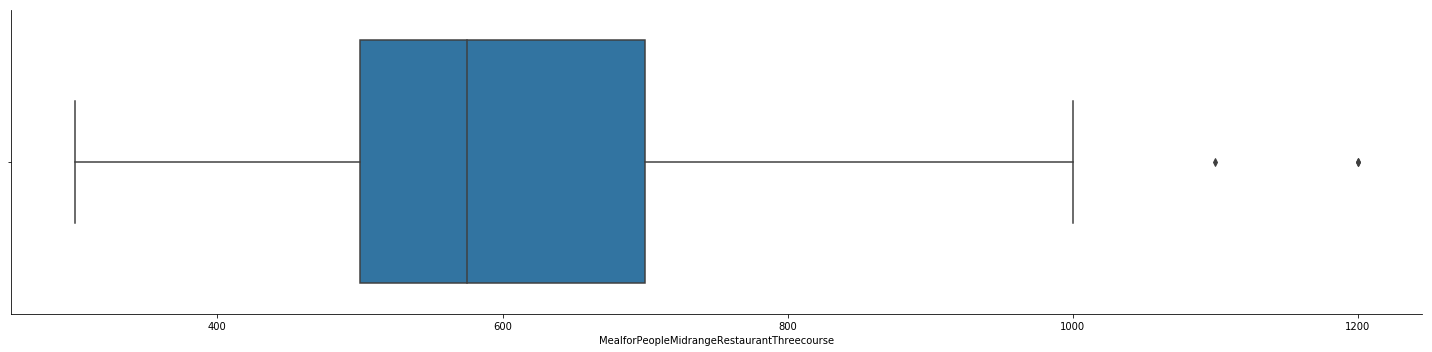

In [13]:
sns.catplot(x='MealforPeopleMidrangeRestaurantThreecourse',data=df_costofliving,kind='box',aspect=4)

# from above box plot there are 2 upper outliers

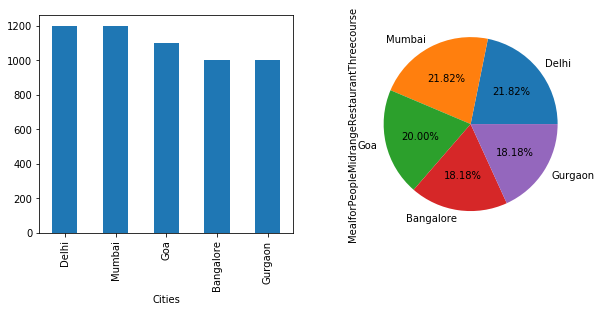

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df_costofliving['MealforPeopleMidrangeRestaurantThreecourse'].sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
df_costofliving['MealforPeopleMidrangeRestaurantThreecourse'].sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

- from above bar chart Delhi and Mumbai is the highest cost price 

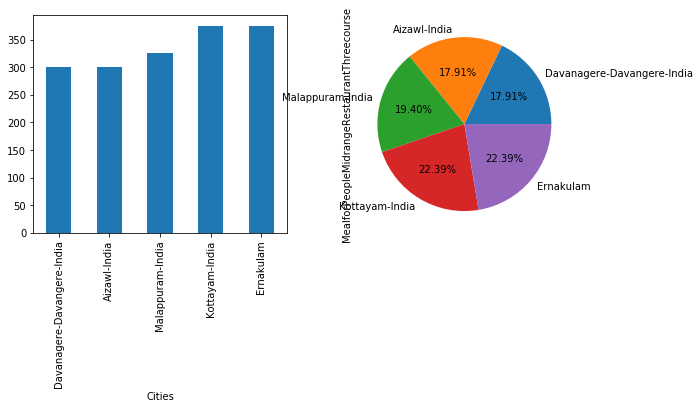

In [15]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df_costofliving['MealforPeopleMidrangeRestaurantThreecourse'].sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
df_costofliving['MealforPeopleMidrangeRestaurantThreecourse'].sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

- from above chart Davanagare and Aizwal is the lowest cost price

# DomesticBeerliterdraught

In [16]:
df_costofliving['DomesticBeerliterdraught'].isnull().any()

False

In [17]:
df_costofliving['DomesticBeerliterdraught'].describe()

count    109.000000
mean     125.779817
std       30.892768
min       75.000000
25%      100.000000
50%      120.000000
75%      150.000000
max      287.500000
Name: DomesticBeerliterdraught, dtype: float64

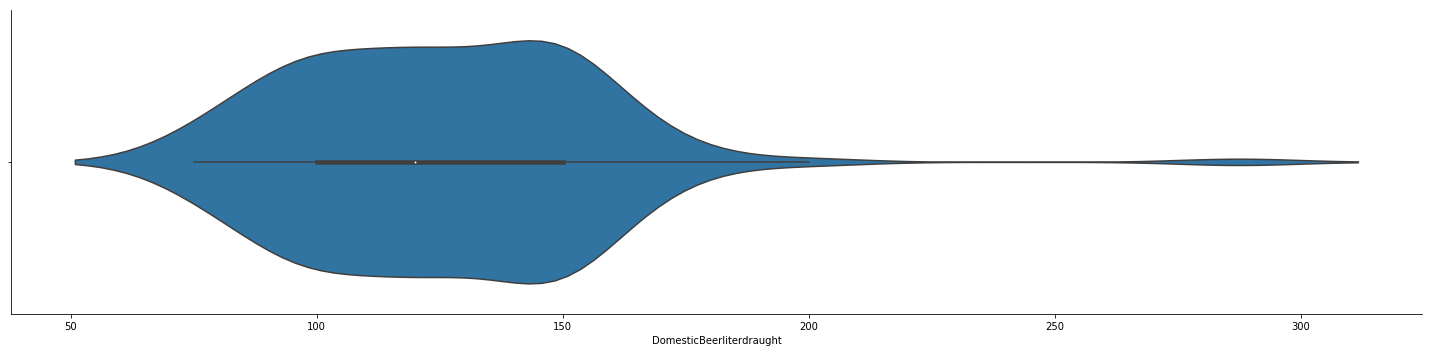

In [18]:
sns.catplot(x='DomesticBeerliterdraught',data=df_costofliving,kind='violin',aspect=4)

In [19]:
df_costofliving['DomesticBeerliterdraught'].sort_values(ascending=False).head()

Cities
Malappuram-India    287.5
Mangalore           200.0
Mumbai              180.0
Jabalpur            170.0
Nagpur              165.0
Name: DomesticBeerliterdraught, dtype: float64

In [20]:
df_costofliving['DomesticBeerliterdraught'].sort_values(ascending=True).head()

Cities
Nalgonda-India          75.0
Dimapur-India           75.0
Kolhapur                75.0
Durgapur-India          80.0
Gangtok-Sikkim-India    80.0
Name: DomesticBeerliterdraught, dtype: float64

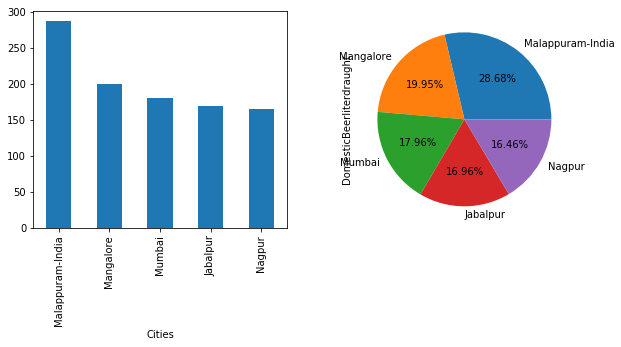

In [21]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df_costofliving['DomesticBeerliterdraught'].sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
df_costofliving['DomesticBeerliterdraught'].sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

- from above bar chart Malapuram is the highest cost price

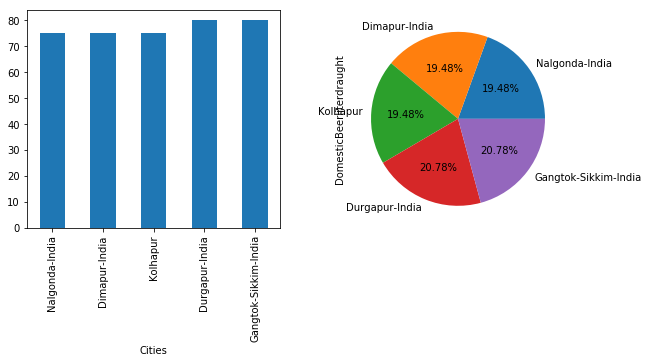

In [22]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df_costofliving['DomesticBeerliterdraught'].sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
df_costofliving['DomesticBeerliterdraught'].sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

- from above chart Nalgonda, Dimapur,and  Nalgonda is the lowest price

# Cappuccinoregular

In [23]:
df_costofliving['Cappuccinoregular'].isnull().any()

True

In [24]:
Cappuccinoregular=df_costofliving['Cappuccinoregular']

In [25]:
Cappuccinoregular.describe()

count    107.000000
mean     102.981869
std       30.663932
min       30.000000
25%       88.200000
50%      100.000000
75%      115.330000
max      324.000000
Name: Cappuccinoregular, dtype: float64

In [26]:
Cappuccinoregular.dropna(inplace=True)

In [27]:
Cappuccinoregular.sort_values(ascending=False).head()

Cities
Durgapur-India     324.00
Lucknow-Lakhnau    160.00
Mangalore          155.71
Latur-India        155.00
Mumbai             150.26
Name: Cappuccinoregular, dtype: float64

In [28]:
Cappuccinoregular.sort_values(ascending=True).head()

Cities
Dharwad-India       30.0
Malappuram-India    50.0
Jorhat-India        50.0
Kurnool-India       60.0
Imphal-India        65.0
Name: Cappuccinoregular, dtype: float64

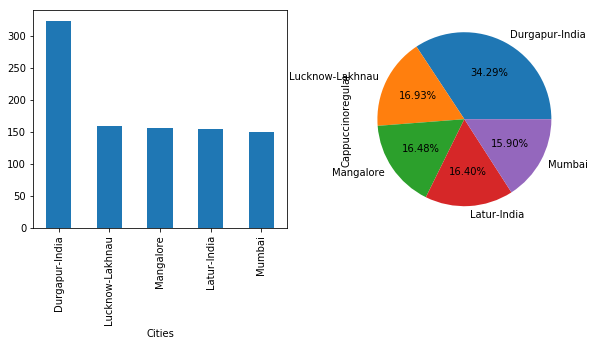

In [29]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
Cappuccinoregular.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
Cappuccinoregular.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

- from above bar chart Durgapur is the highest cost price

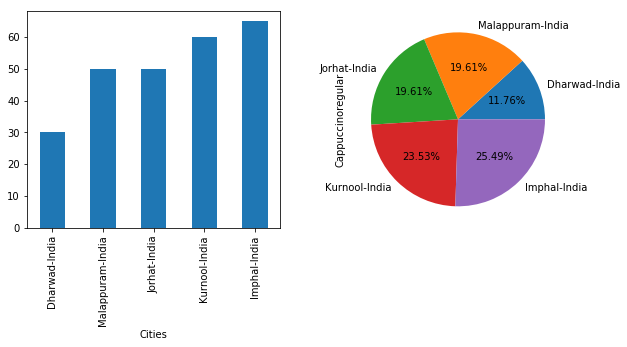

In [30]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
Cappuccinoregular.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
Cappuccinoregular.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

- from above bar chart Dharwad is the lowest price

# Waterliterbottle

In [31]:
df_costofliving['Waterliterbottle'].isnull().any()

False

In [32]:
df_costofliving['Waterliterbottle'].describe()

count    109.000000
mean      13.680459
std        2.505780
min        5.000000
25%       11.670000
50%       14.000000
75%       15.000000
max       20.000000
Name: Waterliterbottle, dtype: float64

In [33]:
df_costofliving['Waterliterbottle'].sort_values(ascending=False).head()

Cities
Ernakulam           20.00
Haridwar-India      20.00
Malappuram-India    18.50
Aurangabad          18.33
Dimapur-India       17.50
Name: Waterliterbottle, dtype: float64

In [34]:
df_costofliving['Waterliterbottle'].sort_values(ascending=True).head()

Cities
Nalgonda-India        5.0
Agartala-India       10.0
Muzaffarpur-India    10.0
Moradabad-India      10.0
Jorhat-India         10.0
Name: Waterliterbottle, dtype: float64

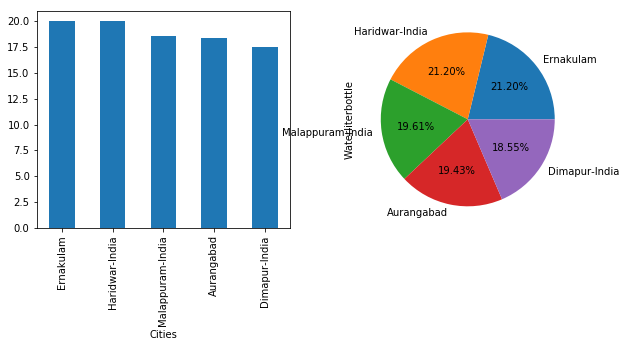

In [35]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df_costofliving['Waterliterbottle'].sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
df_costofliving['Waterliterbottle'].sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

- from above chart Haridwar Ernakulam is the Highest cost price

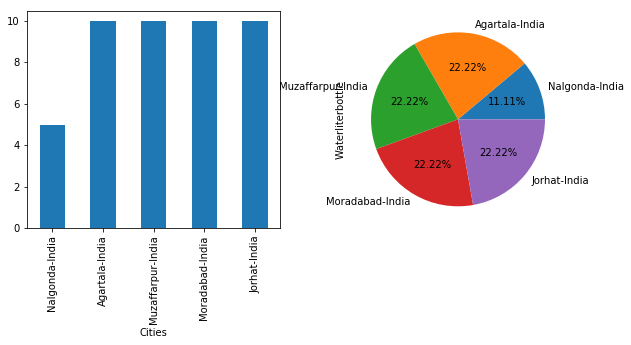

In [36]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df_costofliving['Waterliterbottle'].sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
df_costofliving['Waterliterbottle'].sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

- From above chart  Nalgonda is the lowest price

# LoafofFreshWhiteBread0g

In [37]:
df_costofliving['LoafofFreshWhiteBread0g'].isnull().any()

True

In [38]:
LoafofFreshWhiteBread0g=df_costofliving['LoafofFreshWhiteBread0g']

In [39]:
LoafofFreshWhiteBread0g.describe()

count    108.000000
mean      29.060278
std        4.299718
min       20.000000
25%       26.627500
50%       29.300000
75%       31.345000
max       40.000000
Name: LoafofFreshWhiteBread0g, dtype: float64

In [40]:
LoafofFreshWhiteBread0g.dropna(inplace=True)

In [41]:
LoafofFreshWhiteBread0g.sort_values(ascending=False).head()

Cities
Haridwar-India    40.00
Aurangabad        39.60
Kochi             39.50
Guwahati          36.25
Ahmedabad         35.91
Name: LoafofFreshWhiteBread0g, dtype: float64

In [42]:
LoafofFreshWhiteBread0g.sort_values(ascending=True).head()

Cities
Bhagalpur-India      20.00
Muzaffarpur-India    20.00
Asansol-India        20.00
Bikaner-India        21.67
Jamshedpur           21.80
Name: LoafofFreshWhiteBread0g, dtype: float64

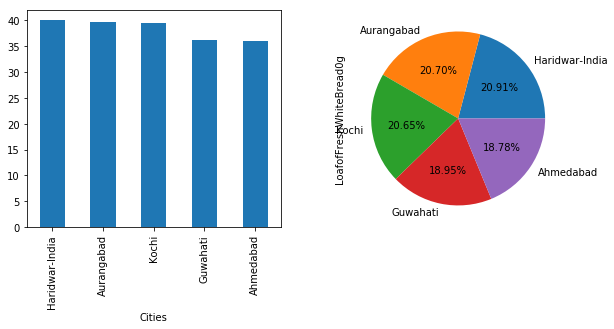

In [43]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
LoafofFreshWhiteBread0g.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
LoafofFreshWhiteBread0g.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

- from above chart Haridwar and Aurangabad  is the highest cost price 

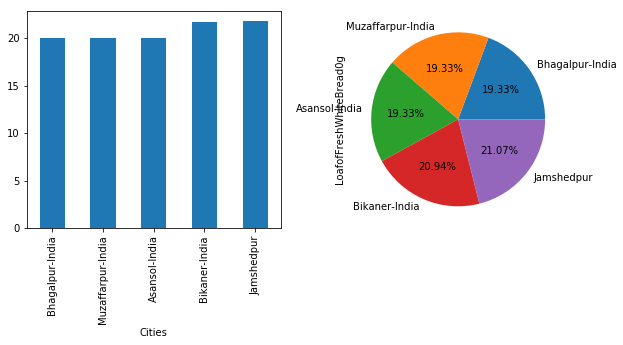

In [44]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
LoafofFreshWhiteBread0g.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
LoafofFreshWhiteBread0g.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

- from above chart Bhargapur and Muzaffar is the lowest cost price

# Eggsregular

In [45]:
df_costofliving['Eggsregular'].isnull().any()

True

In [46]:
Eggsregular=df_costofliving['Eggsregular']

In [47]:
Eggsregular.dropna(inplace=True)

In [48]:
Eggsregular.sort_values(ascending=False).head()

Cities
Dimapur-India     150.00
Imphal-India      120.00
Gurgaon            78.33
Agartala-India     77.00
Aizawl-India       73.33
Name: Eggsregular, dtype: float64

In [49]:
Eggsregular.sort_values(ascending=True).head()

Cities
Kakinada-India                46.75
Ernakulam                     53.33
Nalgonda-India                54.33
Davanagere-Davangere-India    54.50
Bilaspur-India                56.67
Name: Eggsregular, dtype: float64

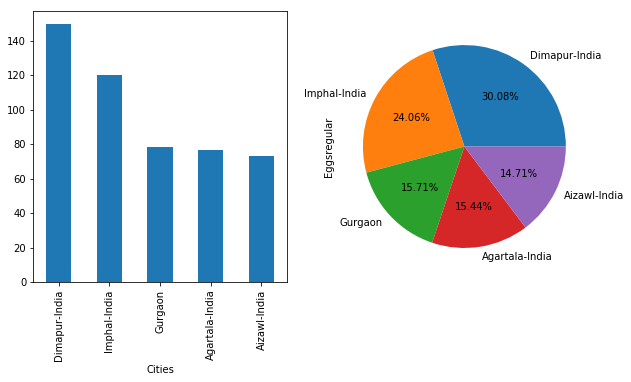

In [50]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_costofliving['Eggsregular'].sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
df_costofliving['Eggsregular'].sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

- from above chart Dimapur is the highest cost price

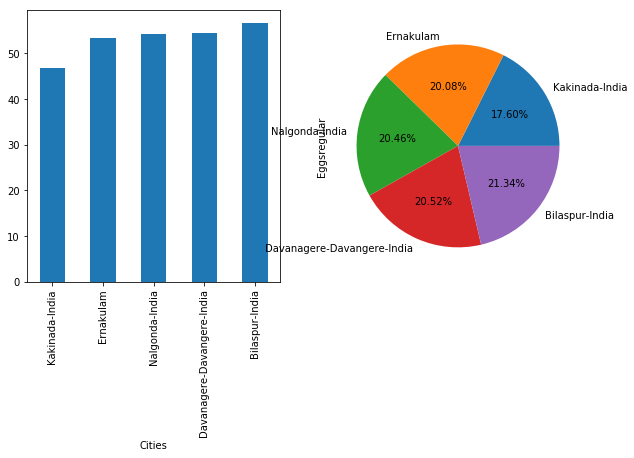

In [51]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
Eggsregular.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
Eggsregular.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

# ChickenBreastsBonelessSkinless1kg

In [52]:
df_costofliving['ChickenBreastsBonelessSkinless1kg'].isnull().any()

False

In [53]:
ChickenBreastsBonelessSkinless1kg=df_costofliving['ChickenBreastsBonelessSkinless1kg']

In [54]:
ChickenBreastsBonelessSkinless1kg.sort_values(ascending=False).head()

Cities
Bathinda-India     500.00
Moradabad-India    304.44
Ernakulam          290.00
Chandigarh         281.67
Goa                280.00
Name: ChickenBreastsBonelessSkinless1kg, dtype: float64

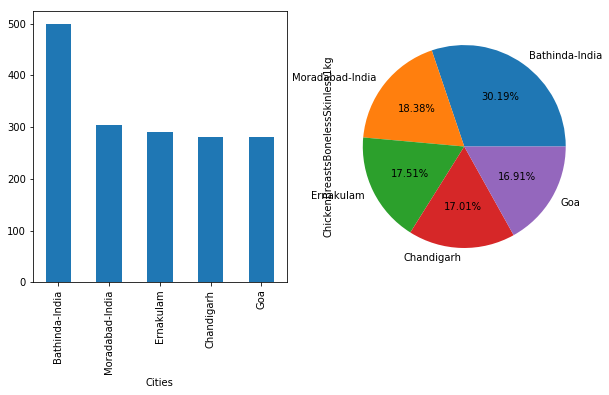

In [55]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ChickenBreastsBonelessSkinless1kg.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
ChickenBreastsBonelessSkinless1kg.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

In [56]:
ChickenBreastsBonelessSkinless1kg.sort_values(ascending=True).head()

Cities
Dharwad-India         80.00
Nalgonda-India       135.00
Jammu                150.00
Malappuram-India     150.00
Muzaffarpur-India    158.33
Name: ChickenBreastsBonelessSkinless1kg, dtype: float64

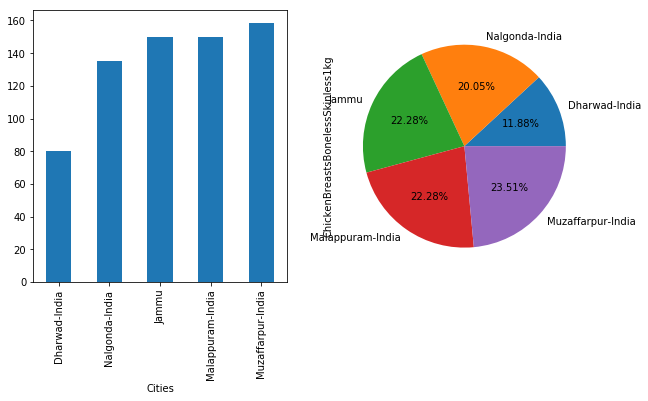

In [57]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ChickenBreastsBonelessSkinless1kg.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
ChickenBreastsBonelessSkinless1kg.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

# Apples1kg

In [58]:
df_costofliving['Apples1kg'].isnull().any()

False

In [59]:
Apples1kg=df_costofliving['Apples1kg']

In [60]:
Apples1kg.dropna(inplace=True)

In [61]:
Apples1kg.sort_values(ascending=False).head()

Cities
Gangtok-Sikkim-India    215.00
Kurnool-India           186.67
Jorhat-India            182.50
Dimapur-India           180.00
Imphal-India            180.00
Name: Apples1kg, dtype: float64

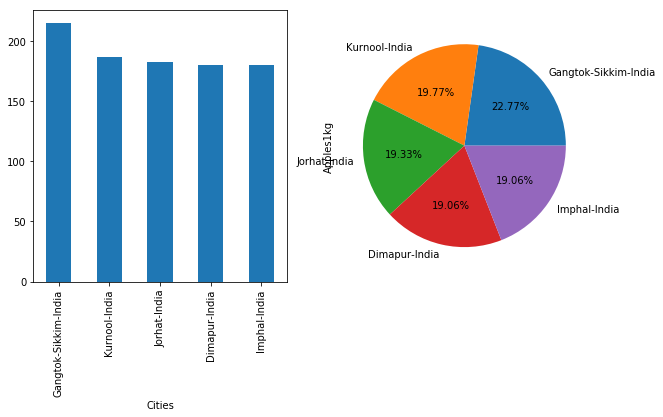

In [62]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
Apples1kg.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
Apples1kg.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

- Apple per 1kg : Highest cost city is Sikkim
- Compare to sikkhim apple cost is slightly difference to remaining 4 cities and also i observed that remaining all cities are equal 

In [63]:
Apples1kg.sort_values(ascending=True).head()

Cities
Kanpur            74.0
Bilaspur-India    80.0
Durgapur-India    80.0
Bikaner-India     80.0
Haridwar-India    80.0
Name: Apples1kg, dtype: float64

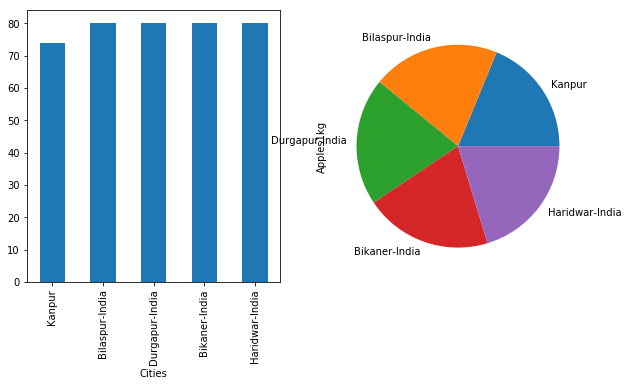

In [64]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
Apples1kg.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
Apples1kg.sort_values(ascending=True).head().plot('pie')
plt.show()

# Oranges1kg

In [65]:
df_costofliving['Oranges1kg'].isnull().any()

True

In [66]:
Oranges1kg=df_costofliving['Oranges1kg']

In [67]:
Oranges1kg.dropna(inplace=True)

In [68]:
Oranges1kg.sort_values(ascending=False).head()

Cities
Dimapur-India    150.00
Jorhat-India     145.00
Imphal-India     145.00
Goa              106.67
Mumbai            82.22
Name: Oranges1kg, dtype: float64

In [69]:
Oranges1kg.sort_values(ascending=True).head()

Cities
Gangtok-Sikkim-India    20.00
Bikaner-India           36.67
Ajmer-India             36.67
Jodhpur                 36.67
Kurnool-India           37.50
Name: Oranges1kg, dtype: float64

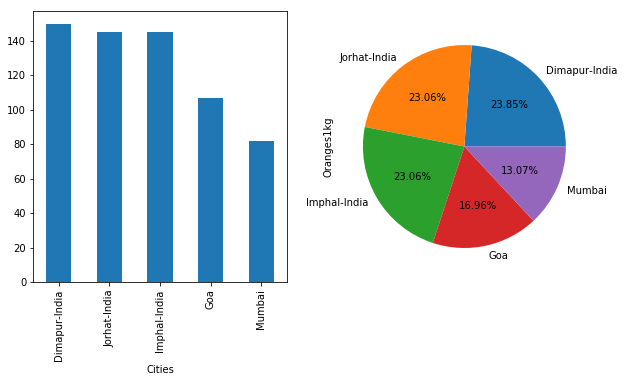

In [70]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
Oranges1kg.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
Oranges1kg.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

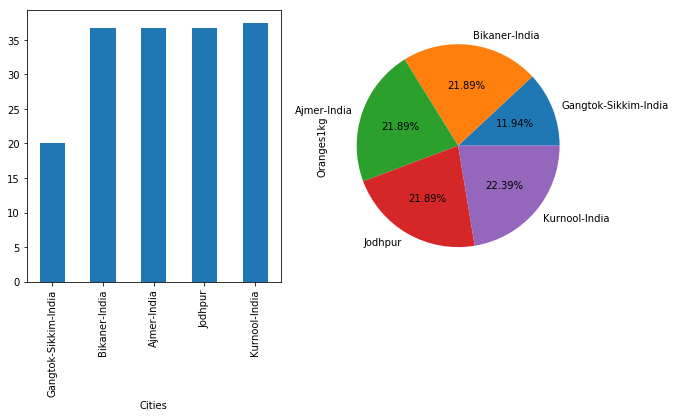

In [71]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
Oranges1kg.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
Oranges1kg.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

# Potato1kg

In [72]:
df_costofliving['Potato1kg'].isnull().any()

False

In [73]:
df_costofliving['Potato1kg'].sort_values(ascending=False).head()

Cities
Malappuram-India    45.00
Aizawl-India        43.33
Bongaigaon-India    40.00
Dimapur-India       40.00
Erode-India         34.21
Name: Potato1kg, dtype: float64

In [74]:
df_costofliving['Potato1kg'].sort_values(ascending=True).head()

Cities
Jammu             13.33
Bhopal            14.17
Bathinda-India    15.00
Bikaner-India     15.00
Jabalpur          15.00
Name: Potato1kg, dtype: float64

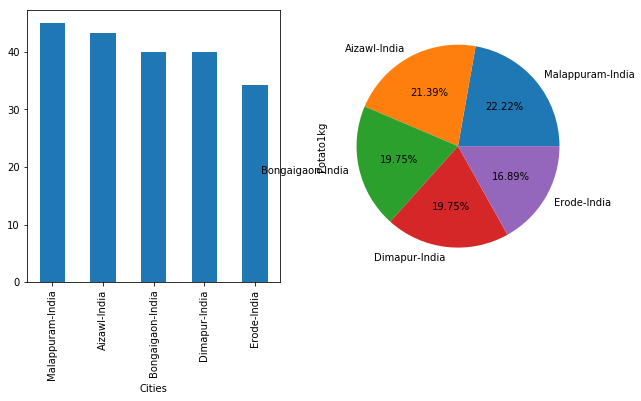

In [75]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_costofliving['Potato1kg'].sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
df_costofliving['Potato1kg'].sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

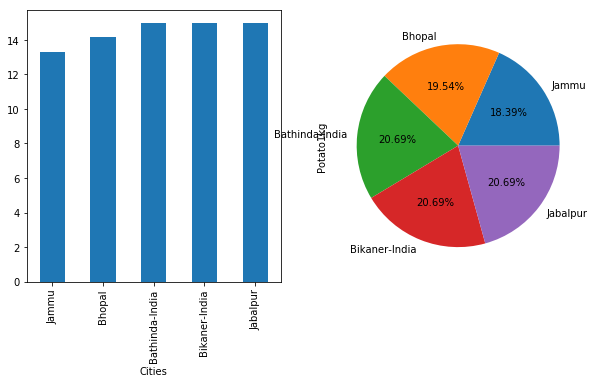

In [76]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df_costofliving['Potato1kg'].sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
df_costofliving['Potato1kg'].sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

# Lettucehead

In [77]:
df_costofliving['Lettucehead'].isnull().any()

True

In [78]:
Lettucehead=df_costofliving['Lettucehead']

In [79]:
Lettucehead.dropna(inplace=True)

In [80]:
Lettucehead.sort_values(ascending=False).head()

Cities
Guwahati         93.33
Jorhat-India     75.00
Bikaner-India    60.00
Jodhpur          60.00
Kurnool-India    59.00
Name: Lettucehead, dtype: float64

In [81]:
Lettucehead.sort_values(ascending=True).head()

Cities
Lucknow-Lakhnau    11.67
Allahabad-India    11.67
Latur-India        15.00
Bhilai-India       16.67
Kota-India         18.33
Name: Lettucehead, dtype: float64

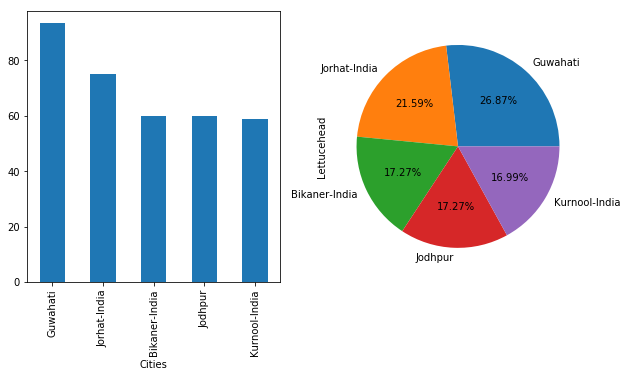

In [82]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
Lettucehead.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
Lettucehead.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

In [83]:
df_costofliving.keys()

Index(['MealforPeopleMidrangeRestaurantThreecourse',
       'DomesticBeerliterdraught', 'Cappuccinoregular', 'Waterliterbottle',
       'LoafofFreshWhiteBread0g', 'Eggsregular',
       'ChickenBreastsBonelessSkinless1kg', 'Apples1kg', 'Oranges1kg',
       'Potato1kg', 'Lettucehead', 'BottleofWineMidRange',
       'ImportedBeerliterbottle', 'MonthlyPassRegularPrice',
       'Taxi1kmNormalTariff', 'Gasolineliter',
       'ToyotaCorolla6l7kWComfortOrEquivalentNewCar',
       'minofPrepaidMobileTariffLocalNoDiscountsorPlans',
       'TennisCourtRentHouronWeekend',
       'InternationalPrimarySchoolYearlyforChild',
       'SummerDressinChainStoreZara', 'PairofMenLeatherBusinessShoes',
       'ApartmentbedroomOutsideofCentre', 'ApartmentbedroomsOutsideofCentre',
       'PriceperSquareMetertoBuyApartmentOutsideofCentre',
       'MortgageInterestRateinPercentagesYearlyforYearsFixedRate'],
      dtype='object')

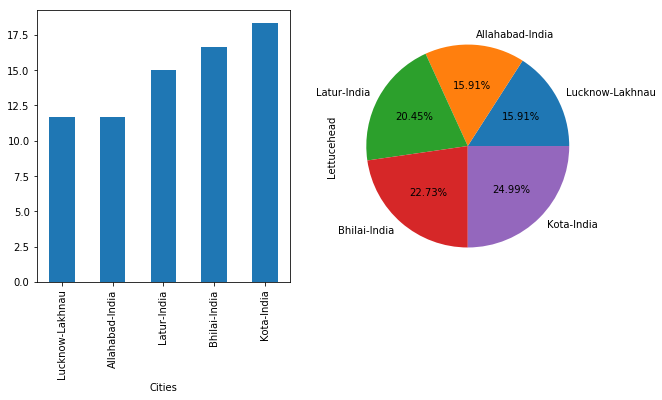

In [84]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
Lettucehead.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
Lettucehead.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

# BottleofWineMidRange

In [85]:
df_costofliving['BottleofWineMidRange'].isnull().any()

True

In [86]:
BottleofWineMidRange=df_costofliving['BottleofWineMidRange']

In [87]:
BottleofWineMidRange.dropna(inplace=True)

In [88]:
BottleofWineMidRange.sort_values(ascending=False).head()

Cities
Faridabad      1200.0
Chandigarh     1000.0
Bhubaneswar     900.0
Gurgaon         800.0
Hisar-India     800.0
Name: BottleofWineMidRange, dtype: float64

In [89]:
BottleofWineMidRange.sort_values(ascending=True).head()

Cities
Belgaum          150.0
Dharwad-India    200.0
Hubli            200.0
Bhilai-India     240.0
Nagpur           240.0
Name: BottleofWineMidRange, dtype: float64

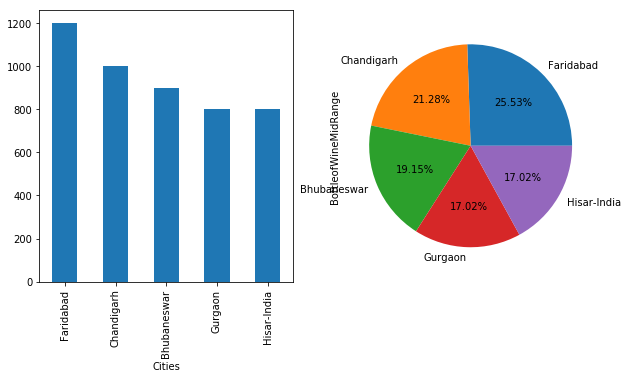

In [90]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
BottleofWineMidRange.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
BottleofWineMidRange.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

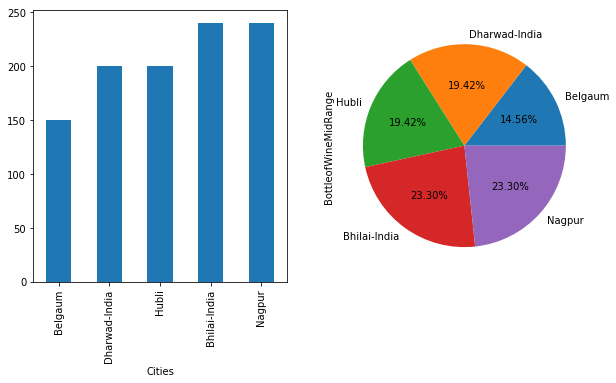

In [91]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
BottleofWineMidRange.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
BottleofWineMidRange.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

# ImportedBeerliterbottle

In [92]:
df_costofliving['ImportedBeerliterbottle'].isnull().any()

True

In [93]:
ImportedBeerliterbottle=df_costofliving['ImportedBeerliterbottle']

In [94]:
ImportedBeerliterbottle.dropna(inplace=True)

In [95]:
ImportedBeerliterbottle.sort_values(ascending=False).head()

Cities
Mumbai        232.61
Amravati      225.00
Aurangabad    225.00
Chandigarh    225.00
Jaipur        221.67
Name: ImportedBeerliterbottle, dtype: float64

In [96]:
ImportedBeerliterbottle.sort_values(ascending=True).head()

Cities
Gangtok-Sikkim-India     85.0
Imphal-India            100.0
Dimapur-India           100.0
Berhampur-India         105.0
Dharwad-India           120.0
Name: ImportedBeerliterbottle, dtype: float64

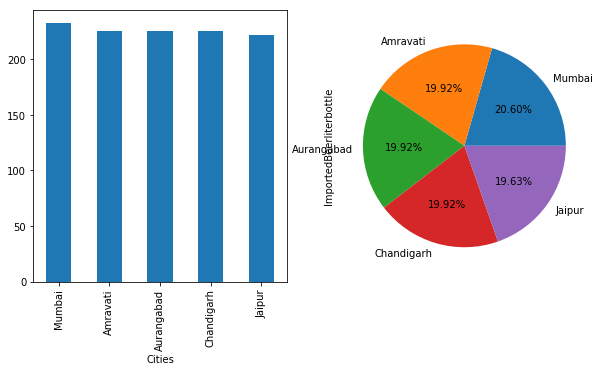

In [97]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ImportedBeerliterbottle.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
ImportedBeerliterbottle.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

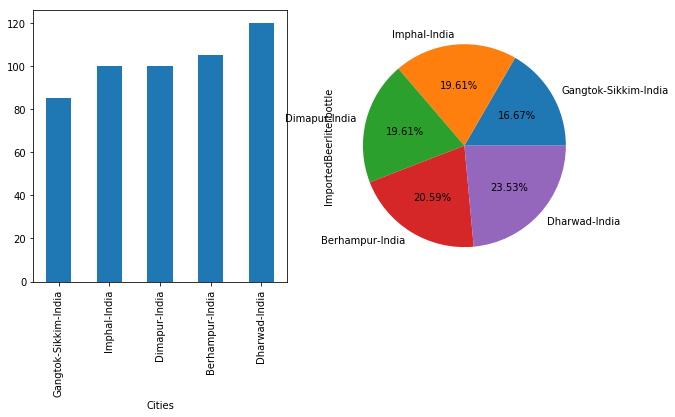

In [98]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ImportedBeerliterbottle.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
ImportedBeerliterbottle.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

# MonthlyPassRegularPrice

In [99]:
df_costofliving['MonthlyPassRegularPrice'].isnull().any()

True

In [100]:
MonthlyPassRegularPrice=df_costofliving['MonthlyPassRegularPrice']

In [101]:
MonthlyPassRegularPrice.dropna(inplace=True)

In [102]:
MonthlyPassRegularPrice.sort_values(ascending=False).head()

Cities
Bangalore            1500.0
Bokaro-India         1250.0
Gurgaon              1200.0
Gandhinagar-India    1100.0
Haldwani-India       1000.0
Name: MonthlyPassRegularPrice, dtype: float64

In [103]:
MonthlyPassRegularPrice.sort_values(ascending=True).head()

Cities
Gulbarga-India    200.0
Nagercoil         225.0
Mangalore         235.0
Erode-India       250.0
Nasik             250.0
Name: MonthlyPassRegularPrice, dtype: float64

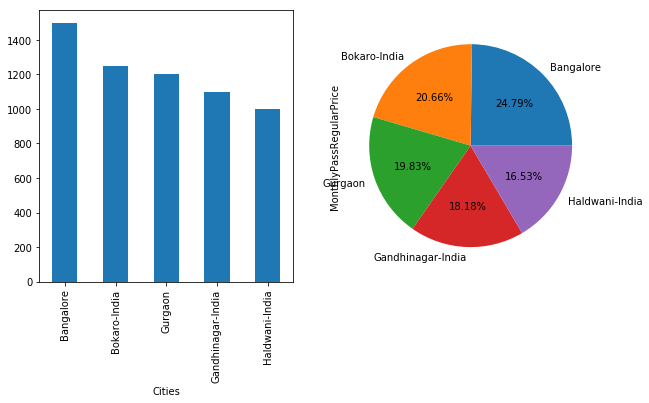

In [104]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
MonthlyPassRegularPrice.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
MonthlyPassRegularPrice.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

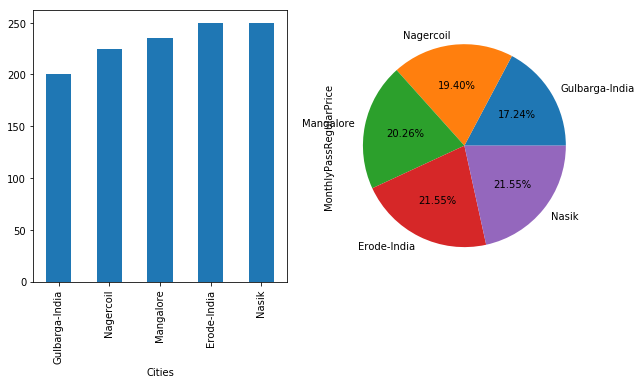

In [105]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
MonthlyPassRegularPrice.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
MonthlyPassRegularPrice.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

# Taxi1kmNormalTariff

In [106]:
df_costofliving['Taxi1kmNormalTariff'].isnull().any()

True

In [107]:
Taxi1kmNormalTariff=df_costofliving['Taxi1kmNormalTariff']

In [108]:
Taxi1kmNormalTariff.dropna(inplace=True)

In [109]:
Taxi1kmNormalTariff.sort_values(ascending=False).head()

Cities
Kakinada-India      50.0
Malappuram-India    40.0
Aizawl-India        30.0
Kurnool-India       30.0
Goa                 25.5
Name: Taxi1kmNormalTariff, dtype: float64

In [110]:
Taxi1kmNormalTariff.sort_values(ascending=True).head()

Cities
Durgapur-India     7.5
Agartala-India     9.0
Bhagalpur-India    9.0
Kanpur             9.5
Gwalior-India      9.5
Name: Taxi1kmNormalTariff, dtype: float64

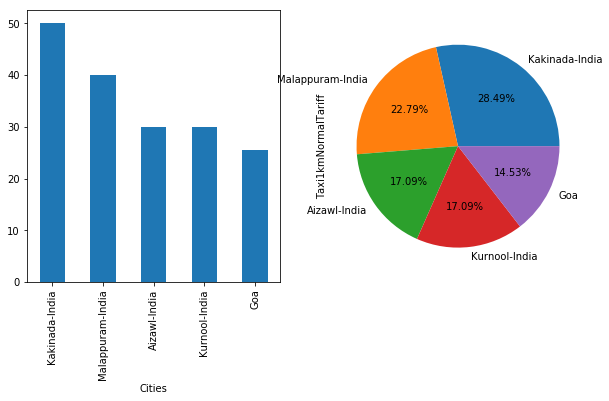

In [111]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
Taxi1kmNormalTariff.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
Taxi1kmNormalTariff.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

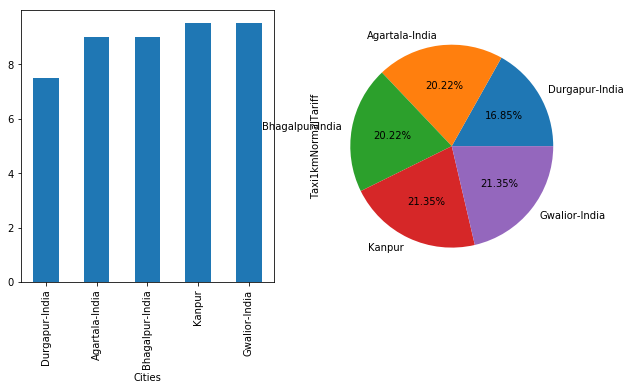

In [112]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
Taxi1kmNormalTariff.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
Taxi1kmNormalTariff.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

# Gasolineliter

In [113]:
df_costofliving['Gasolineliter'].isnull().any()

True

In [114]:
Gasolineliter=df_costofliving['Gasolineliter']

In [115]:
Gasolineliter.dropna(inplace=True)

In [116]:
Gasolineliter.sort_values(ascending=False).head()

Cities
Aurangabad          81.67
Amravati            80.32
Nashik-India        79.83
Bongaigaon-India    79.00
Kakinada-India      79.00
Name: Gasolineliter, dtype: float64

In [117]:
Gasolineliter.sort_values(ascending=True).head()

Cities
Aizawl-India     59.00
Dimapur-India    65.00
Goa              65.58
Jorhat-India     66.09
Imphal-India     66.09
Name: Gasolineliter, dtype: float64

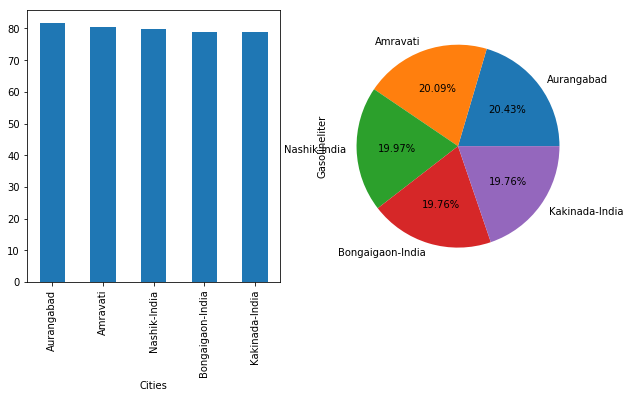

In [118]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
Gasolineliter.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
Gasolineliter.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

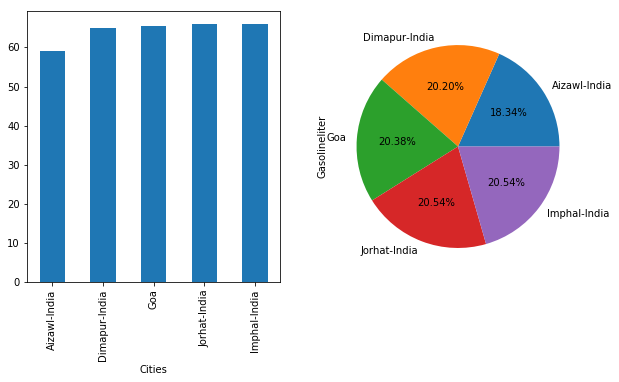

In [119]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
Gasolineliter.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
Gasolineliter.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

# ToyotaCorolla6l7kWComfortOrEquivalentNewCar

In [120]:
df_costofliving['ToyotaCorolla6l7kWComfortOrEquivalentNewCar'].isnull().any()

True

In [121]:
ToyotaCorolla6l7kWComfortOrEquivalentNewCar=df_costofliving['ToyotaCorolla6l7kWComfortOrEquivalentNewCar']

In [122]:
ToyotaCorolla6l7kWComfortOrEquivalentNewCar.dropna(inplace=True)

In [123]:
ToyotaCorolla6l7kWComfortOrEquivalentNewCar.sort_values(ascending=False).head()

Cities
Kurnool-India     2300000.00
Agartala-India    1900000.00
Gulbarga-India    1818000.00
Kolhapur          1818000.00
Bangalore         1764355.95
Name: ToyotaCorolla6l7kWComfortOrEquivalentNewCar, dtype: float64

In [124]:
ToyotaCorolla6l7kWComfortOrEquivalentNewCar.sort_values(ascending=True).head()

Cities
Latur-India          850000.00
Nalgonda-India       900000.00
Dharwad-India       1000000.00
Kakinada-India      1025000.00
Malappuram-India    1033333.33
Name: ToyotaCorolla6l7kWComfortOrEquivalentNewCar, dtype: float64

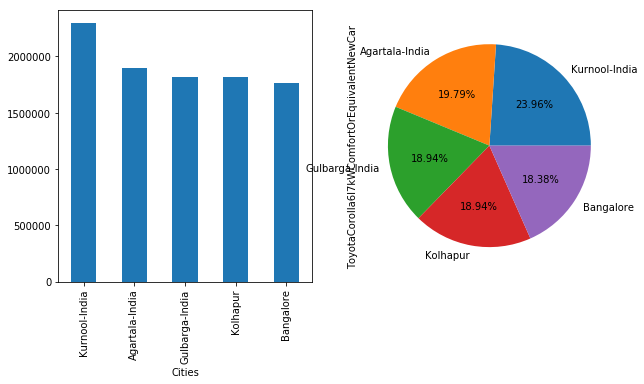

In [125]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ToyotaCorolla6l7kWComfortOrEquivalentNewCar.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
ToyotaCorolla6l7kWComfortOrEquivalentNewCar.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

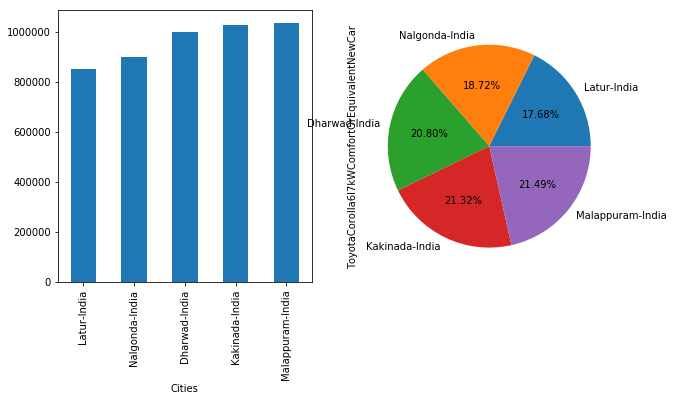

In [126]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ToyotaCorolla6l7kWComfortOrEquivalentNewCar.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
ToyotaCorolla6l7kWComfortOrEquivalentNewCar.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

# MinofPrepaidMobileTariffLocalNoDiscountsorPlans

In [127]:
df_costofliving['minofPrepaidMobileTariffLocalNoDiscountsorPlans'].isnull().any()

True

In [128]:
MinofPrepaidMobileTariffLocalNoDiscountsorPlans=df_costofliving['minofPrepaidMobileTariffLocalNoDiscountsorPlans']

In [129]:
MinofPrepaidMobileTariffLocalNoDiscountsorPlans.dropna(inplace=True)

In [130]:
MinofPrepaidMobileTariffLocalNoDiscountsorPlans.sort_values(ascending=False).head()

Cities
Kurnool-India      1.10
Moradabad-India    1.03
Agartala-India     1.00
Jalandhar          1.00
Guntur             1.00
Name: minofPrepaidMobileTariffLocalNoDiscountsorPlans, dtype: float64

In [131]:
MinofPrepaidMobileTariffLocalNoDiscountsorPlans.sort_values(ascending=True).head()

Cities
Agra              0.40
Haldwani-India    0.45
Kakinada-India    0.51
Ajmer-India       0.53
Bathinda-India    0.63
Name: minofPrepaidMobileTariffLocalNoDiscountsorPlans, dtype: float64

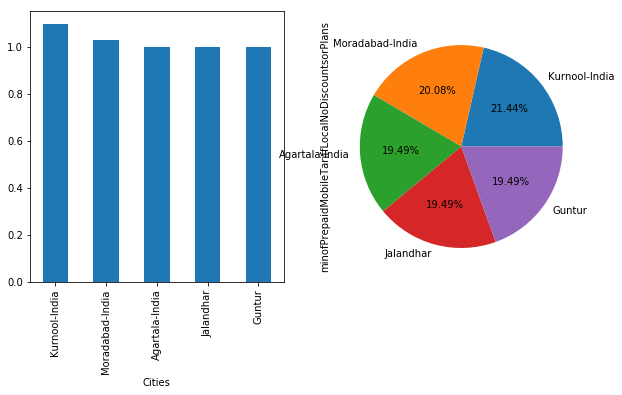

In [132]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
MinofPrepaidMobileTariffLocalNoDiscountsorPlans.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
MinofPrepaidMobileTariffLocalNoDiscountsorPlans.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

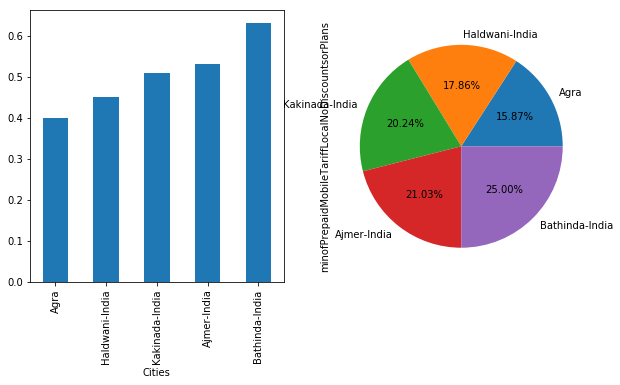

In [133]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
MinofPrepaidMobileTariffLocalNoDiscountsorPlans.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
MinofPrepaidMobileTariffLocalNoDiscountsorPlans.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

# TennisCourtRentHouronWeekend

In [134]:
df_costofliving['TennisCourtRentHouronWeekend'].isnull().any()

True

In [135]:
TennisCourtRentHouronWeekend=df_costofliving['TennisCourtRentHouronWeekend']

In [136]:
TennisCourtRentHouronWeekend.dropna(inplace=True)

In [137]:
TennisCourtRentHouronWeekend.sort_values(ascending=False).head()

Cities
Amravati             1425.00
Kozhikode-Calicut    1133.33
Faridabad            1000.00
Bharuch              1000.00
Haora-India          1000.00
Name: TennisCourtRentHouronWeekend, dtype: float64

In [138]:
TennisCourtRentHouronWeekend.sort_values(ascending=True).head()

Cities
Bathinda-India        0.0
Kota-India           50.0
Aizawl-India        100.0
Malappuram-India    200.0
Gulbarga-India      200.0
Name: TennisCourtRentHouronWeekend, dtype: float64

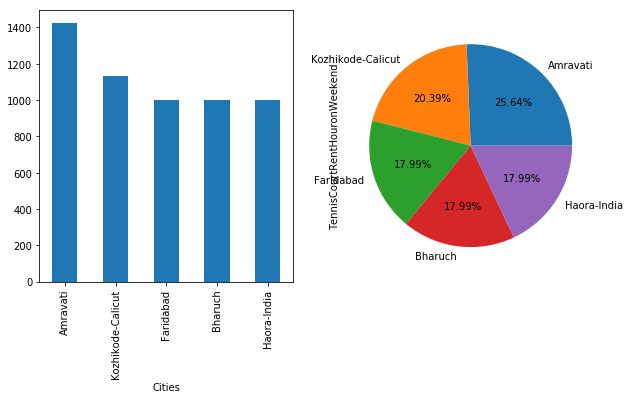

In [139]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
TennisCourtRentHouronWeekend.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
TennisCourtRentHouronWeekend.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

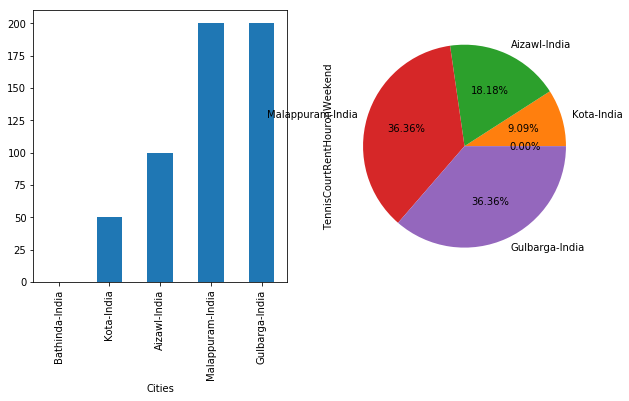

In [140]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
TennisCourtRentHouronWeekend.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
TennisCourtRentHouronWeekend.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

# InternationalPrimarySchoolYearlyforChild

In [141]:
df_costofliving['InternationalPrimarySchoolYearlyforChild'].isnull().any()

True

In [142]:
InternationalPrimarySchoolYearlyforChild=df_costofliving['InternationalPrimarySchoolYearlyforChild']

In [143]:
InternationalPrimarySchoolYearlyforChild.dropna(inplace=True)

In [144]:
InternationalPrimarySchoolYearlyforChild.sort_values(ascending=False).head()

Cities
Agra              340000.00
Haridwar-India    200000.00
Gurgaon           196538.46
Kurnool-India     185000.00
Bangalore         179377.68
Name: InternationalPrimarySchoolYearlyforChild, dtype: float64

In [145]:
df_costofliving['InternationalPrimarySchoolYearlyforChild'].sort_values(ascending=True).head()

Cities
Aizawl-India       36000.0
Bhagalpur-India    45000.0
Dharwad-India      50000.0
Bathinda-India     55000.0
Bhilai-India       60000.0
Name: InternationalPrimarySchoolYearlyforChild, dtype: float64

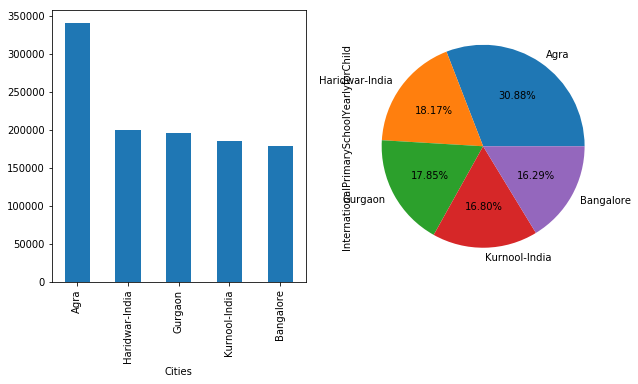

In [146]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
InternationalPrimarySchoolYearlyforChild.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
InternationalPrimarySchoolYearlyforChild.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

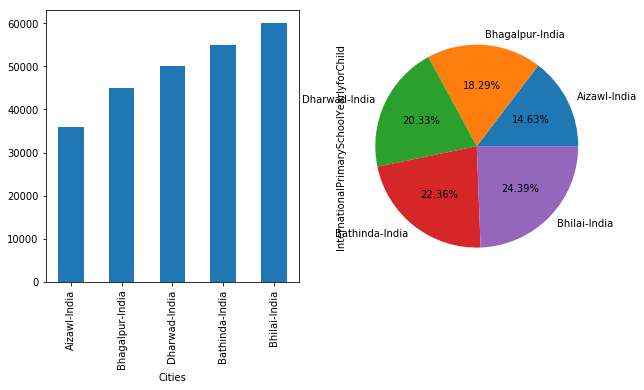

In [147]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
InternationalPrimarySchoolYearlyforChild.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
InternationalPrimarySchoolYearlyforChild.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

# SummerDressinChainStoreZara

In [148]:
df_costofliving['SummerDressinChainStoreZara'].isnull().any()

True

In [149]:
SummerDressinChainStoreZara=df_costofliving['SummerDressinChainStoreZara']

In [150]:
SummerDressinChainStoreZara.dropna(inplace=True)

In [151]:
SummerDressinChainStoreZara.sort_values(ascending=False).head()

Cities
Bongaigaon-India    4500.00
Bikaner-India       3666.67
Faridabad           3600.00
Chandigarh          3393.33
Jodhpur             3280.00
Name: SummerDressinChainStoreZara, dtype: float64

In [152]:
SummerDressinChainStoreZara.sort_values(ascending=True).head()

Cities
Malappuram-India    1200.0
Jorhat-India        1250.0
Nagercoil           1339.8
Bhagalpur-India     1400.0
Nellore             1500.0
Name: SummerDressinChainStoreZara, dtype: float64

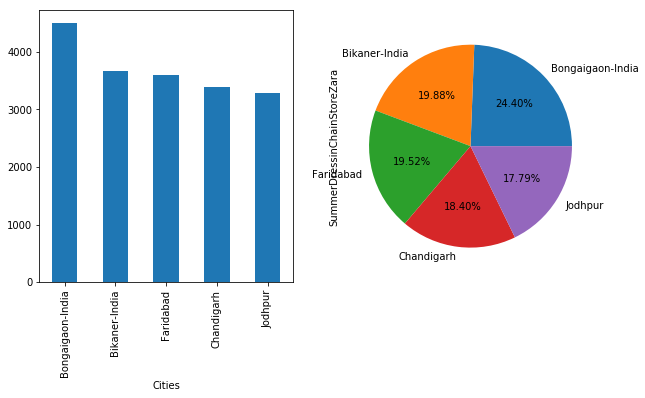

In [153]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
SummerDressinChainStoreZara.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
SummerDressinChainStoreZara.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

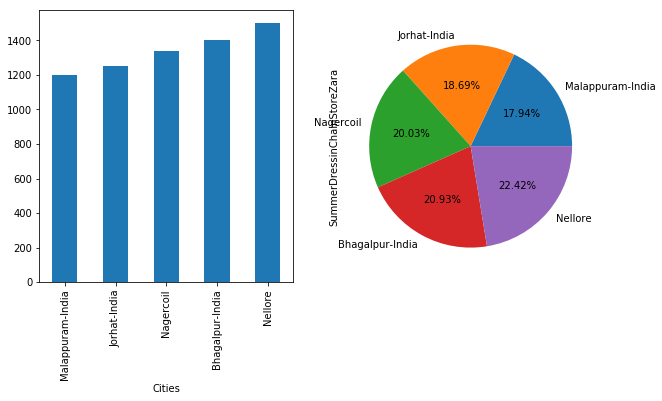

In [154]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
SummerDressinChainStoreZara.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
SummerDressinChainStoreZara.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

# PairofMenLeatherBusinessShoes

In [155]:
df_costofliving['PairofMenLeatherBusinessShoes'].isnull().any()

True

In [156]:
PairofMenLeatherBusinessShoes=df_costofliving['PairofMenLeatherBusinessShoes']

In [157]:
PairofMenLeatherBusinessShoes.dropna(inplace=True)

In [158]:
PairofMenLeatherBusinessShoes.sort_values(ascending=False).head()

Cities
Bongaigaon-India        5000.00
Bathinda-India          4333.33
Gurgaon                 3353.12
Gangtok-Sikkim-India    3333.33
Mumbai                  3080.15
Name: PairofMenLeatherBusinessShoes, dtype: float64

In [159]:
df_costofliving['PairofMenLeatherBusinessShoes'].sort_values(ascending=True).head()

Cities
Nalgonda-India     600.00
Haridwar-India    1000.00
Belgaum           1268.75
Agra              1537.50
Aizawl-India      1750.00
Name: PairofMenLeatherBusinessShoes, dtype: float64

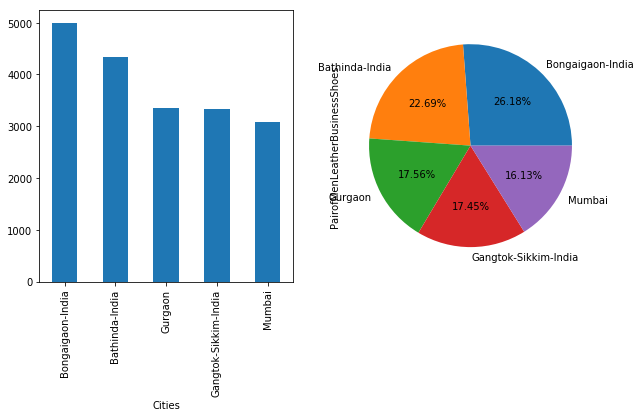

In [160]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
PairofMenLeatherBusinessShoes.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
PairofMenLeatherBusinessShoes.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

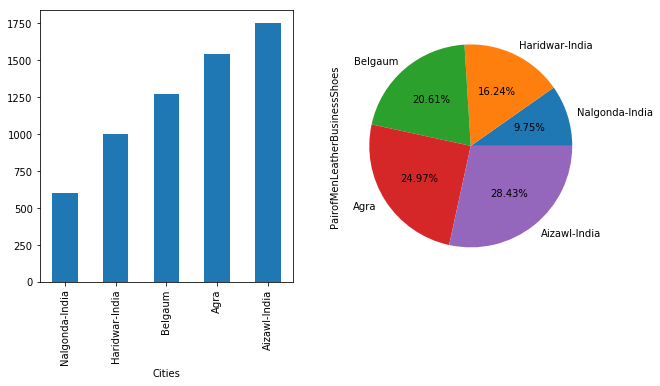

In [161]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
PairofMenLeatherBusinessShoes.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
PairofMenLeatherBusinessShoes.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

# ApartmentbedroomOutsideofCentre

In [162]:
df_costofliving['ApartmentbedroomOutsideofCentre'].isnull().any()

True

In [163]:
ApartmentbedroomOutsideofCentre=df_costofliving['ApartmentbedroomOutsideofCentre']

In [164]:
ApartmentbedroomOutsideofCentre.dropna(inplace=True)

In [165]:
ApartmentbedroomOutsideofCentre.sort_values(ascending=False).head()

Cities
Mumbai          19367.82
Madras-India    11600.00
Bangalore        9965.69
Gurgaon          9910.71
Delhi            9843.75
Name: ApartmentbedroomOutsideofCentre, dtype: float64

In [166]:
ApartmentbedroomOutsideofCentre.sort_values(ascending=True).head()

Cities
Bhagalpur-India    1500.0
Imphal-India       1750.0
Jorhat-India       2250.0
Nalgonda-India     2500.0
Amritsar           2500.0
Name: ApartmentbedroomOutsideofCentre, dtype: float64

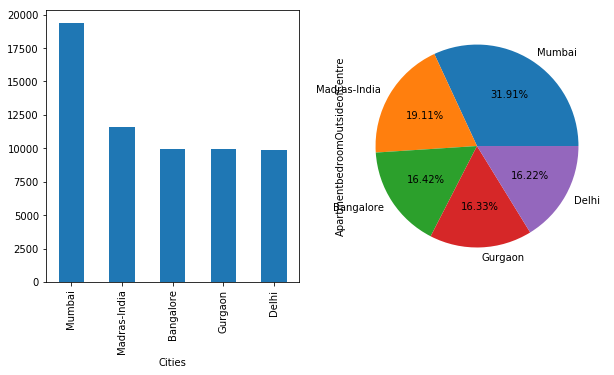

In [167]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ApartmentbedroomOutsideofCentre.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
ApartmentbedroomOutsideofCentre.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

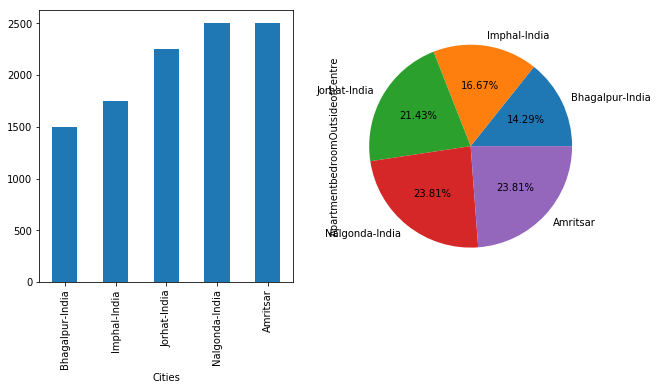

In [168]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ApartmentbedroomOutsideofCentre.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
ApartmentbedroomOutsideofCentre.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

# ApartmentbedroomsOutsideofCentre

In [169]:
df_costofliving['ApartmentbedroomsOutsideofCentre'].isnull().any()

True

In [170]:
ApartmentbedroomsOutsideofCentre=df_costofliving['ApartmentbedroomsOutsideofCentre']

In [171]:
ApartmentbedroomsOutsideofCentre.dropna(inplace=True)

In [172]:
ApartmentbedroomsOutsideofCentre.sort_values(ascending=False).head()

Cities
Mumbai          46350.65
Gurgaon         26937.50
Bangalore       25644.93
Madras-India    23000.00
Delhi           22638.95
Name: ApartmentbedroomsOutsideofCentre, dtype: float64

In [173]:
ApartmentbedroomsOutsideofCentre.sort_values(ascending=True).head()

Cities
Jorhat-India      4750.0
Dimapur-India     5000.0
Imphal-India      6000.0
Nalgonda-India    6000.0
Meerut            6000.0
Name: ApartmentbedroomsOutsideofCentre, dtype: float64

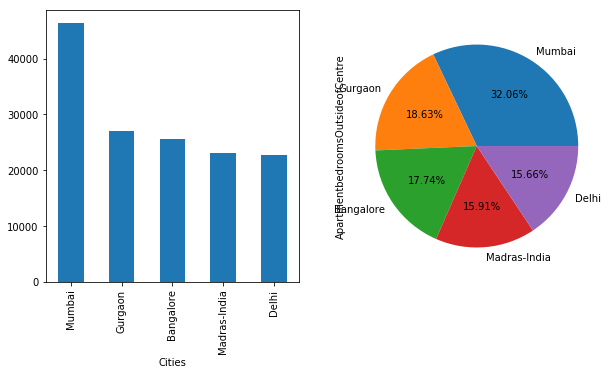

In [174]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ApartmentbedroomsOutsideofCentre.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
ApartmentbedroomsOutsideofCentre.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

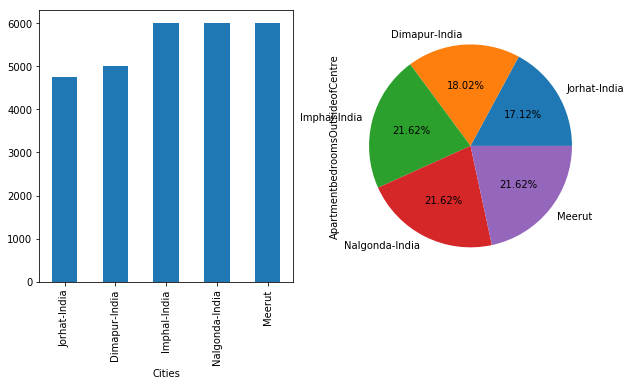

In [175]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ApartmentbedroomsOutsideofCentre.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
ApartmentbedroomsOutsideofCentre.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

# PriceperSquareMetertoBuyApartmentOutsideofCentre

In [176]:
df_costofliving['PriceperSquareMetertoBuyApartmentOutsideofCentre'].isnull().any()

True

In [177]:
PriceperSquareMetertoBuyApartmentOutsideofCentre=df_costofliving['PriceperSquareMetertoBuyApartmentOutsideofCentre']

In [178]:
PriceperSquareMetertoBuyApartmentOutsideofCentre.dropna(inplace=True)

In [179]:
PriceperSquareMetertoBuyApartmentOutsideofCentre.sort_values(ascending=False).head()

Cities
Mumbai             187957.72
Bharuch            163738.45
Moradabad-India    163518.81
Jabalpur           151273.18
Ernakulam          132558.10
Name: PriceperSquareMetertoBuyApartmentOutsideofCentre, dtype: float64

In [180]:
PriceperSquareMetertoBuyApartmentOutsideofCentre.sort_values(ascending=True).head()

Cities
Bokaro-India       9000.00
Hosur             10763.91
Hisar-India       12000.00
Durgapur-India    16038.23
Nalgonda-India    16145.87
Name: PriceperSquareMetertoBuyApartmentOutsideofCentre, dtype: float64

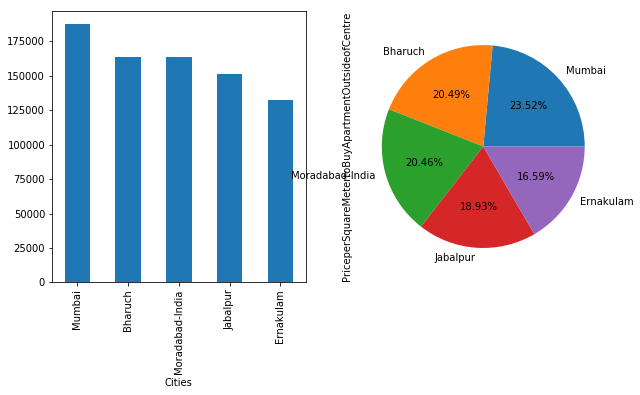

In [181]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
PriceperSquareMetertoBuyApartmentOutsideofCentre.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
PriceperSquareMetertoBuyApartmentOutsideofCentre.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

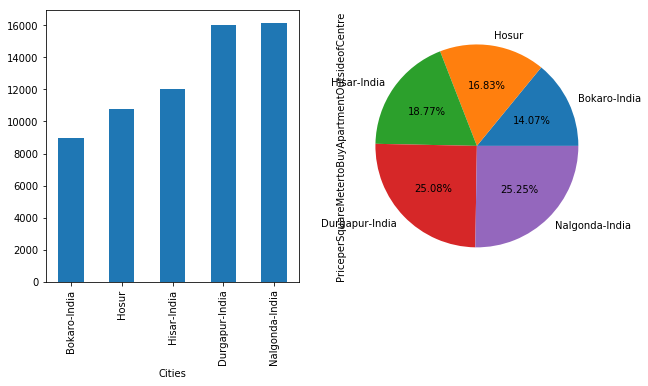

In [182]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
PriceperSquareMetertoBuyApartmentOutsideofCentre.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
PriceperSquareMetertoBuyApartmentOutsideofCentre.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

# MortgageInterestRateinPercentagesYearlyforYearsFixedRate

In [183]:
df_costofliving['MortgageInterestRateinPercentagesYearlyforYearsFixedRate'].isnull().any()

True

In [184]:
MortgageInterestRateinPercentagesYearlyforYearsFixedRate=df_costofliving['MortgageInterestRateinPercentagesYearlyforYearsFixedRate']

In [185]:
MortgageInterestRateinPercentagesYearlyforYearsFixedRate.sort_values(ascending=False).head()

Cities
Dharwad-India     12.00
Nashik-India      11.50
Agra              11.07
Nalgonda-India    11.00
Bathinda-India    11.00
Name: MortgageInterestRateinPercentagesYearlyforYearsFixedRate, dtype: float64

In [186]:
MortgageInterestRateinPercentagesYearlyforYearsFixedRate.dropna(inplace=True)

In [187]:
MortgageInterestRateinPercentagesYearlyforYearsFixedRate.sort_values(ascending=True).head()

Cities
Aizawl-India            5.00
Gangtok-Sikkim-India    7.00
Kakinada-India          7.00
Mangalore               8.45
Moradabad-India         8.67
Name: MortgageInterestRateinPercentagesYearlyforYearsFixedRate, dtype: float64

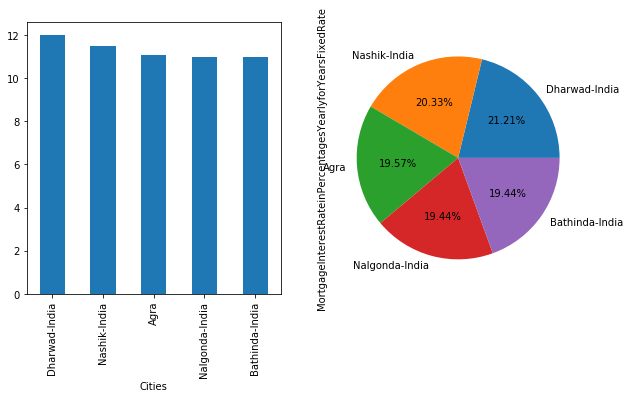

In [188]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
MortgageInterestRateinPercentagesYearlyforYearsFixedRate.sort_values(ascending=False).head().plot('bar')
plt.subplot(1,2,2)
MortgageInterestRateinPercentagesYearlyforYearsFixedRate.sort_values(ascending=False).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

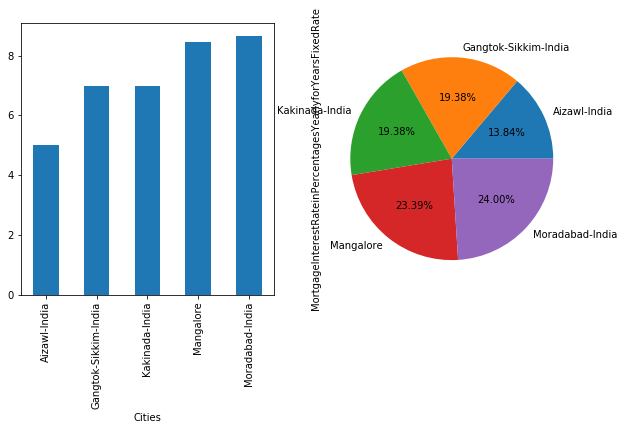

In [189]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
MortgageInterestRateinPercentagesYearlyforYearsFixedRate.sort_values(ascending=True).head().plot('bar')
plt.subplot(1,2,2)
MortgageInterestRateinPercentagesYearlyforYearsFixedRate.sort_values(ascending=True).head().plot(kind='pie',autopct='%.2f%%')
plt.show()

In [193]:
waterprice = []
for i in df_costofliving['Waterliterbottle']:
    if i<=13.00:
        waterprice.append('low')    
    else:
        waterprice.append('high') 

In [194]:
waterprice

['low',
 'low',
 'high',
 'high',
 'high',
 'low',
 'high',
 'high',
 'low',
 'high',
 'low',
 'high',
 'low',
 'high',
 'low',
 'high',
 'low',
 'high',
 'low',
 'high',
 'low',
 'high',
 'low',
 'high',
 'low',
 'low',
 'low',
 'high',
 'low',
 'low',
 'high',
 'high',
 'high',
 'high',
 'low',
 'high',
 'high',
 'low',
 'high',
 'low',
 'high',
 'low',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'low',
 'high',
 'low',
 'high',
 'high',
 'high',
 'low',
 'low',
 'high',
 'low',
 'low',
 'low',
 'high',
 'high',
 'high',
 'high',
 'high',
 'low',
 'high',
 'low',
 'low',
 'low',
 'high',
 'low',
 'high',
 'high',
 'low',
 'high',
 'low',
 'high',
 'high',
 'high',
 'low',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'low',
 'high',
 'high',
 'high',
 'low',
 'low',
 'low',
 'high',
 'low',
 'low',
 'high',
 'low',
 'low',
 'low',
 'high',
 'high']

In [191]:
df_costofliving['Waterliterbottle']

Cities
Agartala-India                 10.00
Agra                           12.83
Ahmedabad                      14.88
Aizawl-India                   15.00
Ajmer-India                    15.00
Akola-India                    11.67
Allahabad-India                14.00
Alwar-India                    14.75
Amravati                       12.83
Amritsar                       17.41
Anand-India                    12.50
Anantapur-India                15.00
Asansol-India                  10.00
Aurangabad                     18.33
Balasore-India                 10.00
Bangalore                      15.55
Bathinda-India                 12.22
Belgaum                        13.33
Berhampur-India                11.67
Bhagalpur-India                13.50
Bharuch                        12.50
Bhavnagar-India                13.31
Bhilai-India                   12.83
Bhiwadi-India                  14.75
Bhopal                         12.42
Bhubaneswar                    11.67
Bikaner-India                  

In [192]:
df_costofliving.loc[:,'Waterliterbottle']

Cities
Agartala-India                 10.00
Agra                           12.83
Ahmedabad                      14.88
Aizawl-India                   15.00
Ajmer-India                    15.00
Akola-India                    11.67
Allahabad-India                14.00
Alwar-India                    14.75
Amravati                       12.83
Amritsar                       17.41
Anand-India                    12.50
Anantapur-India                15.00
Asansol-India                  10.00
Aurangabad                     18.33
Balasore-India                 10.00
Bangalore                      15.55
Bathinda-India                 12.22
Belgaum                        13.33
Berhampur-India                11.67
Bhagalpur-India                13.50
Bharuch                        12.50
Bhavnagar-India                13.31
Bhilai-India                   12.83
Bhiwadi-India                  14.75
Bhopal                         12.42
Bhubaneswar                    11.67
Bikaner-India                  